In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('AMZN.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-14,1728.910034,1741.890015,1722.000000,1736.430054,1736.430054,1910200
1,2019-10-15,1742.140015,1776.449951,1740.619995,1767.380005,1767.380005,3111700
2,2019-10-16,1773.329956,1786.239990,1770.520020,1777.430054,1777.430054,2763400
3,2019-10-17,1796.489990,1798.849976,1782.020020,1787.479980,1787.479980,2647400
4,2019-10-18,1787.800049,1793.979980,1749.199951,1757.510010,1757.510010,3362500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,2829.508398,2860.626106,2795.891348,2828.669023,2828.669023,4.136039e+06
std,622.438992,626.492007,614.011852,619.216643,619.216643,1.826900e+06
min,1641.510010,1741.890015,1626.030029,1676.609985,1676.609985,8.813000e+05
25%,2242.402405,2318.234985,2230.302490,2285.360046,2285.360046,2.863750e+06
50%,3136.510009,3175.030029,3096.994995,3130.025024,3130.025024,3.639450e+06
75%,3293.497498,3321.932434,3256.390015,3291.735107,3291.735107,4.952475e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.556730e+07


In [24]:
period=20
data['SMA']=data['Adj Close'].rolling(window=period).mean()
data['STD']=data['Adj Close'].rolling(window=period).std()

In [31]:
data['upper']=data['SMA']+(data['STD']*2)
data['lower']=data['SMA']-(data['STD']*2)

In [32]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,STD,upper,lower
499,2021-10-06,3213.530029,3264.340088,3198.620117,3262.010010,3262.010010,2533000,3373.596497,93.629805,3560.856106,3186.336887
500,2021-10-07,3291.540039,3325.750000,3283.060059,3302.429932,3302.429932,2409100,3364.509998,91.119756,3546.749510,3182.270486
501,2021-10-08,3317.000000,3321.429932,3288.199951,3288.620117,3288.620117,1995500,3355.483508,89.128412,3533.740332,3177.226684
502,2021-10-11,3275.000000,3292.590088,3238.100098,3246.300049,3246.300049,2034200,3344.940015,88.938535,3522.817086,3167.062944
503,2021-10-12,3257.000000,3267.530029,3236.280029,3247.330078,3247.330078,1816700,3334.806519,87.877769,3510.562056,3159.050981


<AxesSubplot:>

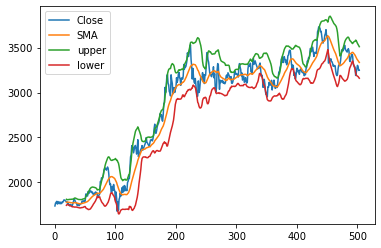

In [33]:
columns=['Close','SMA','upper','lower']
data[columns].plot()

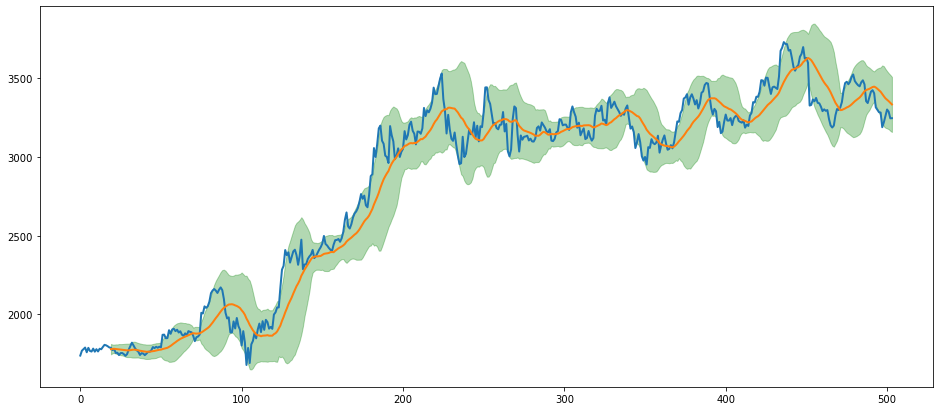

In [34]:
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1,1,1)
x_axis=data.index
ax.fill_between(x_axis,data['upper'],data['lower'],color='green',alpha=0.3)
ax.plot(x_axis,data['Adj Close'],lw=2,label='closing price')
ax.plot(x_axis,data['SMA'],lw = 2,label='SMA');

In [48]:
def buy_sell_signal(data):
    buy_signal = []
    sell_signal = []

    for i in range(len(data['Close'])):
        if data['Adj Close'][i] > data['upper'][i]:
            buy_signal.append(np.nan)
            sell_signal.append(data['Adj Close'][i])
        elif data['Adj Close'][i] < data['lower'][i]:
            buy_signal.append(data['Adj Close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return (buy_signal,sell_signal)

In [49]:
data['buy']=buy_sell_signal(data)[0]
data['sell']=buy_sell_signal(data)[1]

In [43]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,STD,upper,lower,buy,sell
499,2021-10-06,3213.530029,3264.340088,3198.620117,3262.010010,3262.010010,2533000,3373.596497,93.629805,3560.856106,3186.336887,NaN,NaN
500,2021-10-07,3291.540039,3325.750000,3283.060059,3302.429932,3302.429932,2409100,3364.509998,91.119756,3546.749510,3182.270486,NaN,NaN
501,2021-10-08,3317.000000,3321.429932,3288.199951,3288.620117,3288.620117,1995500,3355.483508,89.128412,3533.740332,3177.226684,NaN,NaN
502,2021-10-11,3275.000000,3292.590088,3238.100098,3246.300049,3246.300049,2034200,3344.940015,88.938535,3522.817086,3167.062944,NaN,NaN
503,2021-10-12,3257.000000,3267.530029,3236.280029,3247.330078,3247.330078,1816700,3334.806519,87.877769,3510.562056,3159.050981,NaN,NaN


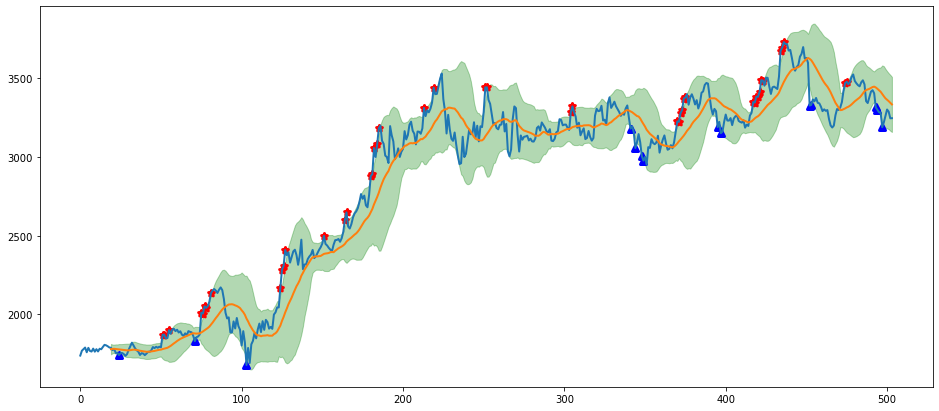

In [52]:
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1,1,1)
ax.fill_between(x_axis,data['upper'],data['lower'],color='green',alpha = 0.3)
ax.plot(x_axis,data['Adj Close'],lw=2,label='closing price')
ax.plot(x_axis,data['SMA'],lw = 2,label='SMA')
ax.scatter(x_axis,data['buy'],color='blue',lw=3,label='buy signal',marker='^')
ax.scatter(x_axis,data['sell'],color='red',lw=3,label='sell signal',marker='*')